In [20]:
import matplotlib.pyplot as plt

# http://www.ecircuitcenter.com/Circuits.htm
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from pathlib import Path
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import SubCircuitFactory
from PySpice.Spice.Parser import SpiceParser
from PySpice.Unit import *
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
from PySpice.Spice.Netlist import Circuit
import numpy as np

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)


In [21]:
# Initialize the Circuit
circuit = Circuit('Name me please')

# Include non-passive elements: 
# D1N4148 is a (regular&cheap) Diode 
circuit.include(spice_library['D1N4148']) 
# LM741 is a (regular&cheap) OpAmp
circuit.include(spice_library['LM741'])

circuit.V('1', 1, circuit.gnd, 'DC 0 AC 2V SIN(0 2V 50)')
# o
#circuit.V('1', circuit.gnd,1, 'SIN(0 2 500)')
circuit.R('1',  1, 2,'10K')
circuit.L('1',  2, 3,'0.3H')
circuit.C('1',  3, 0,'120nF')
# OPAMP Y DIODO SIN PONERSE
#circuit.X('mos1', 'level1', 'd1', 'g1', 'vsss')
#circuit.X('diodus','D1N4148', 1, 2)


print(str(circuit))

.title Name me please
.include /home/m4zz31/anaconda3/lib/python3.7/libraries/D1N4148.lib
.include /home/m4zz31/anaconda3/lib/python3.7/libraries/LM741.lib
V1 1 0 DC 0 AC 2V SIN(0 2V 50)
R1 1 2 10K
L1 2 3 0.3H
C1 3 0 120nF



In [22]:
%%html
<img src="./info.png" width=200 hyeight=160 style="text-align:center"/>

In [23]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=(1/50/10)@u_s, end_time=(3/50)@u_s)

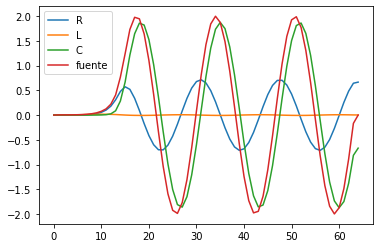

In [24]:
plt.plot(analysis['1']-analysis['2'],label='R')
plt.plot(analysis['2']-analysis['3'],label='L')
plt.plot(analysis['3'],label='C')
plt.plot(analysis['1'],label='fuente')
plt.legend()

In [10]:
# y aca todo junto:
#del(figura)
import random
import matplotlib.pyplot as plt
def doit(w,V=2,R=10,L=3,C=320):
    #w = 2000
    circuit = Circuit('Name me please')
    #circuit.V('1',  circuit.gnd,1 ,f'SIN(0 {V} {w})')
    circuit.V('1',1,0, f'DC 0 AC {V} SIN(0 {V} {w})')
    circuit.R('1',  1, 2,R@u_kΩ)
    circuit.L('1',  2, 3,L@u_H)
    circuit.C('1',  3, 0,C@u_nF)
    tf = 5/w
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=(1/w/100)@u_ms, end_time=tf@u_s)
    # Printer?
    if False:
        #print(str(circuit))
        fig = plt.figure(figsize=(20,4))  # create a figure object
        ax = fig.add_subplot(1, 1, 1)
        plt.plot(-analysis['1']+analysis['2'],label='R')
        plt.plot(-analysis['2']+analysis['3'],label='L')
        ax.plot(-analysis['3'],label='C')
        #ax.set_ylim(-int(V*1.1)-10,int(V*1.1)+10)
        ax.legend()
        ax.set_title(f'freq : {w}')
        print(f'resonance was at {np.sqrt(1/(L*C))}')
    if True:
        return max(abs(analysis['1']-analysis['2']))/R
    return
 
q = float(doit(300))

2020-07-20 20:27:17,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'subtract'> is UNIT_MATCH
2020-07-20 20:27:17,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION


f_zero es 2905
2020-07-18 01:05:08,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:08,259 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:08,260 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:08,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:08,477 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:08,478 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:08,501 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:08,502 - PySpice.Probe.WaveForm.WaveForm.__arr

2020-07-18 01:05:08,730 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:08,738 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:08,739 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:08,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:08,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:08,752 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:08,754 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:08,759 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:08,962 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:08,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:08,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:08,970 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:08,971 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:08,988 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:08,989 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:08,991 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:09,166 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,167 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,168 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,180 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,183 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,192 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,194 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:09,349 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,357 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,360 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,367 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,371 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,377 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:09,552 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,553 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,558 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,570 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,571 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,581 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:09,748 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,749 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,750 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,755 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,763 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,765 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,777 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,778 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:09,941 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,952 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,953 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,961 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:09,962 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:09,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:09,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:10,127 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:10,128 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:10,133 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:10,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:10,135 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:10,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:10,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:10,143 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:11,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,026 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,027 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,032 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,033 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,037 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:11,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,137 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,138 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,140 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,144 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,144 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,145 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,149 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:11,237 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,238 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,244 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,249 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:11,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,359 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,364 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,365 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:11,461 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,464 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,466 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,470 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,471 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:11,571 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,572 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,577 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,578 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,578 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,582 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,584 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:11,672 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,674 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,678 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,679 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,679 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,683 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,683 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:11,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,773 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,774 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:11,781 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:11,783 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:11,787 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:12,680 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:12,683 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:12,696 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:12,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:12,702 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:12,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:12,713 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:12,717 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:12,899 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:12,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:12,902 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:12,906 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:12,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:12,908 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:12,912 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:12,913 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:13,001 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,005 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,006 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,012 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,014 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,015 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,020 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:13,107 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,108 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,113 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,114 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,119 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:13,232 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,233 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,234 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,240 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,249 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,250 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:13,380 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,386 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,386 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,387 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,392 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,393 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,398 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:13,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,508 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,512 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,515 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,519 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,521 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,522 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:13,612 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,612 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,617 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,618 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,618 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,622 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:13,710 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,715 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,719 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:13,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:13,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:13,736 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:14,527 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,528 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,532 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,533 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,534 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,538 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,539 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,540 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:14,630 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,632 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,633 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,638 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,640 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,641 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,645 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,647 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:14,762 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,767 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,769 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,773 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,774 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,775 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,780 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:14,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,876 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,877 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,878 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:14,968 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,975 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:14,976 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:14,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:14,982 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:15,085 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:15,090 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:15,091 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:15,092 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:15,097 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:15,099 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:15,100 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:15,104 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:15,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:15,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:15,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:15,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:15,212 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:15,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:15,220 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:15,221 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:15,351 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:15,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:15,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:15,360 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:15,361 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:15,361 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:15,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:15,371 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:16,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,230 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,231 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,234 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,242 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,250 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:16,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,343 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,344 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,345 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,351 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,352 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:16,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,470 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,475 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,481 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,482 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:16,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,581 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,582 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,583 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,587 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,590 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,590 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,594 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:16,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,682 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,687 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,687 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,688 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,693 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,694 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,694 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:16,784 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,785 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,786 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,791 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,792 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,797 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,798 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:16,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,893 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,894 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,895 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,901 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:16,901 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,902 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:16,906 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:16,995 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:16,998 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:17,003 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:17,004 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:17,004 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:17,009 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:17,010 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:17,010 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

f_zero es 750
2020-07-18 01:05:17,550 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:17,551 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:17,556 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:17,799 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:17,801 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:17,802 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:17,822 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:17,823 - PySpice.Probe.WaveForm.WaveForm.__arra

2020-07-18 01:05:17,961 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:17,972 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:17,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:17,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:17,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:17,980 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:17,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:17,986 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:18,092 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,093 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,097 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,099 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,100 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,104 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,105 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:18,202 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,203 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,204 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,211 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,212 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,213 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,218 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,219 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:18,340 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,347 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,348 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,348 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,354 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,356 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,363 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:18,479 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,481 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,489 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,490 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,498 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,502 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:18,661 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,662 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,665 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,672 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,681 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,684 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:18,831 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,839 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,839 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,840 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,846 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,847 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,848 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,856 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:18,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,967 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,968 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:18,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:18,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:18,976 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:20,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,021 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,023 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,033 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,034 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,035 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,045 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,046 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:20,219 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,223 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,224 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,225 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,230 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,231 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,231 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,235 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:20,358 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,360 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,368 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,370 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,381 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,384 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,385 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:20,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,581 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,581 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,591 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,593 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,603 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,604 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:20,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,757 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,758 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,759 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,769 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,770 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,776 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:20,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,883 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,891 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:20,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:20,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:20,899 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:21,058 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:21,060 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:21,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:21,082 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:21,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:21,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:21,094 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:21,096 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:21,249 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:21,258 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:21,260 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:21,261 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:21,266 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:21,267 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:21,270 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:21,277 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:22,440 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,441 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,449 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,449 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,450 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,461 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:22,612 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,612 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,618 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,624 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:22,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,704 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,705 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,705 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,709 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,710 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,710 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,715 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:22,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,798 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,799 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,800 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,804 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,805 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:22,942 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,943 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,944 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,950 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,951 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:22,951 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:22,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:22,957 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:23,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:23,064 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:23,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:23,066 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:23,071 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:23,073 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:23,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:23,079 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:23,163 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:23,165 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:23,169 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:23,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:23,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:23,176 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:23,177 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:23,177 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:23,317 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:23,318 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:23,319 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:23,326 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:23,327 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:23,328 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:23,335 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:23,336 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:23,457 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:23,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:23,467 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:23,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:23,474 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:23,475 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:23,476 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:23,483 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:24,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,329 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,332 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:24,486 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,487 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,494 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,494 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,500 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,501 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:24,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,609 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,616 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,620 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:24,717 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,722 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,722 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,724 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,731 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,732 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:24,853 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,854 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,855 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,859 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,860 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,860 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:24,970 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,976 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,977 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,978 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,984 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:24,985 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:24,986 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:24,993 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:05:25,139 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:25,141 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:25,152 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:25,153 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:25,154 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:25,162 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:25,163 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:25,164 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:05:25,280 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:25,281 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:25,282 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:25,287 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:25,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:05:25,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:05:25,293 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:05:25,294 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

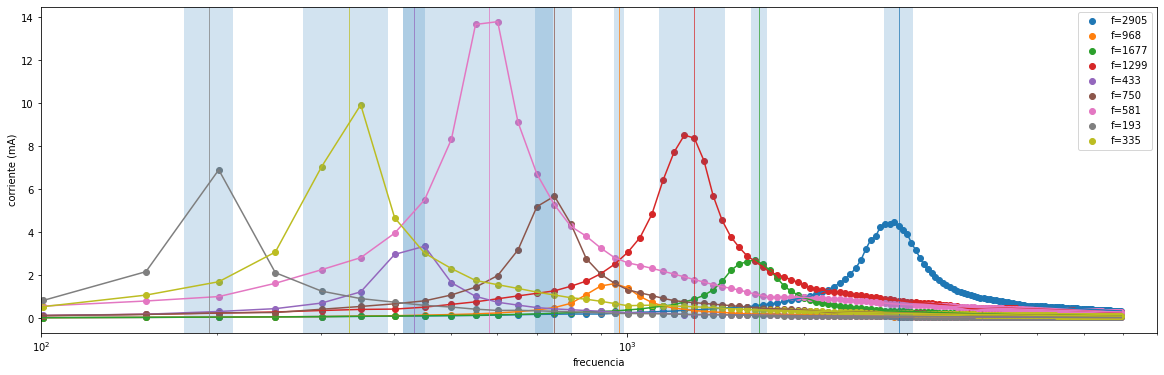

In [19]:
fig, ax = plt.subplots(figsize=(20,6))
for C in [10,50,250]:
    for L in [0.3,2.7,0.9]:
        f_zero = np.sqrt(1E9)/np.sqrt(L*C)/2/np.pi
        print(f'f_zero es {int(f_zero)}')
        try: 
            x = [i for i in range(1,7000,50)]
        except: break
        y = []
        R = .1
        alpha = R / L * 1000
        for j in x:
            y.append(float(doit(j,2,R,L,C)))
        ax.plot(x,y)
        ax.axvspan(f_zero-alpha/2,f_zero+alpha/2,alpha=0.2)
        ax.scatter(x,y,label=f'f={int(f_zero)}')
        col = plt.gca().lines[-1].get_color()
        ax.axvline(linewidth=0.7,color=col, x=f_zero)
ax.set_xlabel('frecuencia')
ax.set_ylabel('corriente (mA)')
ax.legend()
ax.set_xscale('log')
ax.set_xlim([100,8000])
plt.show()

f_zero es 2905
2020-07-18 01:10:04,058 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:04,061 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:04,062 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:04,297 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:04,298 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:04,299 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:04,328 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:04,330 - PySpice.Probe.WaveForm.WaveForm.__arr

2020-07-18 01:10:04,596 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:04,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:04,603 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:04,604 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:04,613 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:04,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:04,617 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:04,630 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:04,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:04,842 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:04,861 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:04,862 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:04,863 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:04,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:04,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:04,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:05,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,051 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,053 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,064 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,065 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,066 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,073 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,073 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:05,230 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,238 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,248 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,249 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,250 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,257 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:05,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,446 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,454 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,456 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,458 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,468 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,469 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,471 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:05,652 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,654 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,655 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,666 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,668 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,669 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,678 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,679 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:05,875 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,888 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:05,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:05,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:05,907 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:06,072 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:06,074 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:06,085 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:06,085 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:06,086 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:06,091 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:06,093 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:06,094 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:07,157 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,159 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,160 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,165 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,166 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,166 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,179 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:07,311 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,316 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,317 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,318 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,323 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,324 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,325 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:07,430 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,432 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,437 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,439 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,445 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,446 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:07,667 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,672 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,676 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,683 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,684 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,685 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,697 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:07,847 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,857 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,859 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,866 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:07,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:07,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:07,882 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:08,022 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:08,023 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:08,028 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:08,029 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:08,030 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:08,036 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:08,037 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:08,038 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:08,230 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:08,231 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:08,232 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:08,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:08,240 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:08,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:08,249 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:08,251 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:08,420 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:08,426 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:08,427 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:08,428 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:08,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:08,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:08,436 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:08,444 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:09,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:09,351 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:09,361 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:09,362 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:09,362 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:09,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:09,372 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:09,373 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:09,561 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:09,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:09,563 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:09,572 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:09,573 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:09,575 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:09,584 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:09,586 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:09,701 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:09,708 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:09,709 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:09,710 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:09,717 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:09,718 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:09,719 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:09,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:09,863 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:09,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:09,871 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:09,872 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:09,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:09,879 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:09,880 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:09,881 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:10,069 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,070 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,071 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,080 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,082 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,090 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,092 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:10,194 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,206 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,207 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,212 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:10,322 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,323 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,331 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,332 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,334 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,340 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,342 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,343 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:10,504 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,505 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,506 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,514 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,515 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,518 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,524 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,525 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:10,644 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,650 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,656 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:10,657 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:10,658 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:10,662 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:11,631 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:11,633 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:11,639 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:11,640 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:11,641 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:11,648 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:11,649 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:11,650 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:11,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:11,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:11,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:11,801 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:11,801 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:11,804 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:11,810 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:11,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:11,955 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:11,961 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:11,962 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:11,963 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:11,968 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:11,969 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:11,970 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:11,975 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:12,094 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,095 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,103 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,104 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,105 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,113 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,114 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,115 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:12,255 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,256 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,257 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,263 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,264 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,265 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:12,413 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,422 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,423 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,432 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,434 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,435 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,443 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:12,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,586 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,591 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,592 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,597 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,598 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,602 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:12,735 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,736 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,737 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,744 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,745 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:12,746 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:12,753 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:12,753 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:13,715 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:13,726 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:13,727 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:13,728 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:13,739 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:13,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:13,741 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:13,751 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:13,916 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:13,917 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:13,925 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:13,926 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:13,928 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:13,940 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:13,941 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:13,943 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:14,114 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,117 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,118 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,127 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,128 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,128 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,140 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,142 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:14,273 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,280 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,281 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,282 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,288 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,289 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,290 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,295 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:14,405 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,406 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,412 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,413 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,420 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,420 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,421 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:14,548 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,549 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,550 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,558 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,558 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,559 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,566 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,567 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:14,691 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,700 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,701 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,702 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,710 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,711 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,712 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,721 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:14,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,873 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,885 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,887 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:14,895 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:14,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:14,898 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

f_zero es 750
2020-07-18 01:10:15,486 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:15,488 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:15,489 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:15,738 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:15,739 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:15,740 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:15,757 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:15,757 - PySpice.Probe.WaveForm.WaveForm.__arra

2020-07-18 01:10:15,905 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:15,913 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:15,915 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:15,917 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:15,925 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:15,926 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:15,930 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:15,942 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:16,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,096 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,097 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,097 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,105 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,107 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:16,239 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,240 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,241 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,246 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,247 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,255 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,264 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,265 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:16,405 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,412 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,413 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,429 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,430 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,431 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,438 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:16,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,605 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,611 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,614 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,615 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,629 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,630 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,631 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:16,813 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,814 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,815 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,820 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,821 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,822 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,827 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,829 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:16,976 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,981 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,982 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,983 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:16,988 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:16,991 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:16,993 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:17,004 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:17,159 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:17,162 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:17,169 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:17,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:17,170 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:17,176 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:17,177 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:17,179 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:18,067 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,068 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,069 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,075 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,076 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,077 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,083 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,085 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:18,193 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,200 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,205 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,206 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,206 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,212 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:18,328 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,329 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,338 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,339 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,340 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,348 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,349 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,350 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:18,463 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,464 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,465 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,470 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,471 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,472 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,477 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,478 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:18,610 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,618 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,619 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,620 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,628 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,629 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,630 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,638 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:18,768 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,769 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,778 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,779 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,780 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,789 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,790 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,791 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:18,938 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,939 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,940 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,945 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,946 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:18,947 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:18,952 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:18,953 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:19,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:19,055 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:19,056 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:19,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:19,062 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:19,063 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:19,063 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:19,069 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:19,875 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:19,879 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:19,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:19,889 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:19,890 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:19,899 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:19,899 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:19,900 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:20,039 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,040 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,041 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,048 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,051 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,057 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:20,188 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,194 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,194 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,195 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,201 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,202 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,202 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,208 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:20,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,337 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,345 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,345 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,346 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,353 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,354 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,355 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:20,484 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,485 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,486 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,494 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,495 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,502 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,503 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:20,636 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,644 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,645 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,646 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,651 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,653 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,658 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:20,786 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,787 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,793 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,794 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,795 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,800 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,801 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,802 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:20,920 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,921 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,923 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,931 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,932 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:20,933 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:20,941 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:20,942 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:21,079 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:21,086 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:21,087 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:21,088 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:21,096 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:21,096 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:21,097 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:21,105 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:21,964 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:21,965 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:21,973 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:21,974 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:21,975 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:21,985 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:21,986 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:21,986 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:22,106 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,107 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,111 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,119 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,120 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,121 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,131 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,134 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:22,286 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,297 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,298 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,301 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,306 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,307 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,308 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,313 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:22,493 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,494 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,505 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,506 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,507 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,515 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,516 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,517 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:22,662 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,663 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,664 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,671 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,672 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,673 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,682 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,683 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:22,841 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,856 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,857 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,858 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,863 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:22,864 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,865 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:22,870 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

2020-07-18 01:10:22,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:22,990 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:23,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:23,000 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:23,001 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:23,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:23,007 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:23,009 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Con

2020-07-18 01:10:23,173 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:23,174 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:23,175 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:23,182 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:23,184 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'add'> is UNIT_MATCH
2020-07-18 01:10:23,186 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2020-07-18 01:10:23,198 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'negative'> is NO_CONVERSION
2020-07-18 01:10:23,199 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - IN

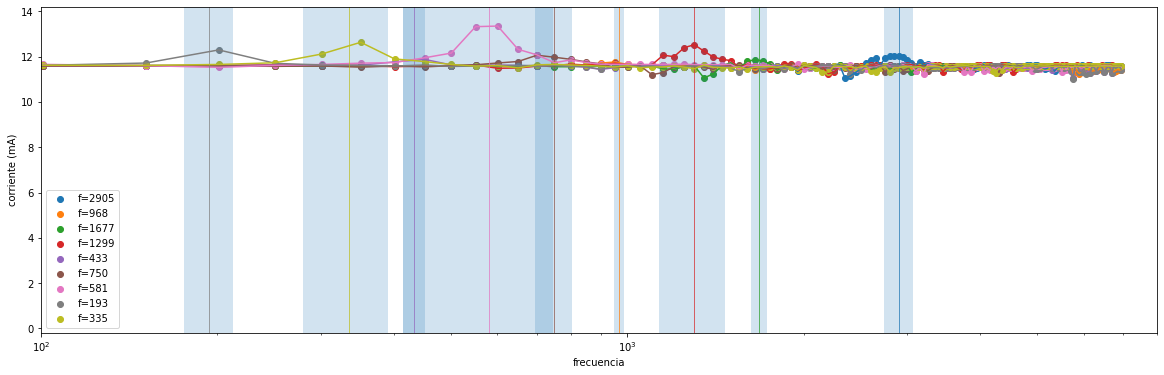

In [21]:
# y aca todo junto:
#del(figura)
import random
import matplotlib.pyplot as plt
def doit(w,V=2,R=10,L=3,C=320):
    #w = 2000
    circuit = Circuit('Name me please')
    #circuit.V('1',  circuit.gnd,1 ,f'SIN(0 {V} {w})')
    circuit.V('1',1,0, f'DC 0 AC {V} SIN(0 {V} {w})')
    circuit.R('1',  1, 2,R@u_kΩ)
    circuit.L('1',  2, 3,L@u_H)
    circuit.C('1',  3, 0,C@u_nF)
    circuit.X('diodus','D1N4148', 2, 3)
    circuit.include(spice_library['D1N4148']) 
    tf = 5/w
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=0.1@u_ms, end_time=tf@u_s)
    # Printer?
    if False:
        #print(str(circuit))
        fig = plt.figure(figsize=(20,4))  # create a figure object
        ax = fig.add_subplot(1, 1, 1)
        plt.plot(-analysis['1']+analysis['2'],label='R')
        plt.plot(-analysis['2']+analysis['3'],label='L')
        ax.plot(-analysis['3'],label='C')
        #ax.set_ylim(-int(V*1.1)-10,int(V*1.1)+10)
        ax.legend()
        ax.set_title(f'freq : {w}')
        print(f'resonance was at {np.sqrt(1/(L*C))}')
    if True:
        return max(abs(-analysis['1']+analysis['2']))/R
    return
fig, ax = plt.subplots(figsize=(20,6))
for C in [10,50,250]:
    for L in [0.3,2.7,0.9]:
        f_zero = np.sqrt(1E9)/np.sqrt(L*C)/2/np.pi
        print(f'f_zero es {int(f_zero)}')
        try: 
            x = [i for i in range(1,7000,50)]
        except: break
        y = []
        R = .1
        alpha = R / L * 1000
        for j in x:
            y.append(float(doit(j,2,R,L,C)))
        ax.plot(x,y)
        ax.axvspan(f_zero-alpha/2,f_zero+alpha/2,alpha=0.2)
        ax.scatter(x,y,label=f'f={int(f_zero)}')
        col = plt.gca().lines[-1].get_color()
        ax.axvline(linewidth=0.7,color=col, x=f_zero)
ax.set_xlabel('frecuencia')
ax.set_ylabel('corriente (mA)')
ax.legend()
ax.set_xscale('log')
ax.set_xlim([100,8000])
ax.set_ylim(-0.2,14.2)
plt.show()

In [30]:
import random
import matplotlib.pyplot as plt
def doit2(w,V=12,R=10,L=3,C=320):
    #w = 2000
    treshold = 4
    circuit = Circuit('Name me please')
    #circuit.V('1',  circuit.gnd,1 ,f'SIN(0 {V} {w})')
    circuit.V('1',1,0, f'DC 0 AC {V} SIN(0 {V} {w})')
    circuit.R('1',  1, 2,R@u_kΩ)
    circuit.L('1',  2, 3,L@u_H)
    circuit.X('diodus','D1N4148', 2, 3)
    circuit.include(spice_library['D1N4148']) 
    circuit.C('1',  3, 0,C@u_nF)
    tf = 2/w
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=(1/w/10)@u_ms, end_time=tf@u_s)
    # Printer?
#     if False:
#         #print(str(circuit))
#         fig = plt.figure(figsize=(20,4))  # create a figure object
#         ax = fig.add_subplot(1, 1, 1)
#         ax.plot(analysis['1']-analysis['2'],label='R')
#         auxiliar = analysis['2']-analysis['3']
#         ax.plot(auxiliar,label='L')
#         ax.plot(analysis['3'],label='C')
#         #ax.set_ylim(-int(V*1.1)-10,int(V*1.1)+10)
#         ax.legend()
#         ax.set_title(f'freq : {w}')
#         print(f'resonance was at {np.sqrt(1E9/(L*C)/2/np.pi)}')
#     if False:
#         return max(abs(analysis['2']-analysis['3']))/R
    if True:
        auxiliar = analysis['2']-analysis['3']
        del(circuit)
        return [w,V,R,L,C,int(float(max(auxiliar))>treshold)]
    return
W_vector = [int(x*100) for x in range(1,30)]
V_vector = [x/10 for x in range(1,150)]
R_vector = [x/20 for x in range(1,51,5)]
L_vector = [x/100 for x in range(1,1000,25)]
C_vector = [x/100 for x in range(1,1000,10)]
# w,V=12,R=10,L=3,C=320
answ = []
counter = 0
while counter <4500:
    answ += [doit2(random.choice(W_vector),
     random.choice(V_vector),
     random.choice(R_vector),
     random.choice(L_vector),
     random.choice(C_vector),)]
    counter += 1
import pandas as pd
data = pd.DataFrame(answ,columns=['W','V','R','L','C','D'])
if True:
    data.to_excel("FULL.xlsx")
    #data[:1700].to_excel("TRAIN.xlsx",index=False)
    #data[1700:].to_excel("TEST_cresults.xlsx",index=False)
    #data[1700:].drop('D', axis=1).to_excel("TEST.xlsx",index=False)

In [13]:
data.head()

,W,V,R,L,C,D
0,700,12.3,0.80,4.01,7.41,1
1,800,7.4,2.05,9.26,0.41,0
2,2400,13.8,2.30,4.01,3.61,1
3,1500,2.2,0.30,0.76,8.01,0
4,1900,14.9,1.05,7.76,4.41,1


,W,V,R,L,C,D
0,1200,10.0,1.30,2.26,6.51,1
1,1800,1.9,1.55,1.01,7.61,1
2,2100,13.9,0.05,6.51,7.01,1
3,2400,0.2,1.55,3.26,8.21,0
4,2000,11.3,1.05,2.76,1.91,1
